In [25]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
from keras.optimizers.legacy import Adam

In [2]:
# 0 - Angry
# 1 - Disgust
# 2 - Fear
# 3 - Happy
# 4 - Sad
# 5 - Surprise
# 6 - Neutral
datasets = ['test', 'train', 'val']
moods = {"0": "Angry", "1": "Disgust", "2": "Fear", "3": "Happy", "4": "Sad", "5": "Surprise", "6": "Neutral"}

In [3]:
x_train = []
y_train = []
for directory in datasets:
    for key in moods.keys():
        mood = int(key)
        path = f'./{directory}/{key}/'
        print(path)
        onlyfiles = [f for f in os.listdir(path)]
        for file in onlyfiles:
            x_train.append(cv2.imread(path+file, 0))
            y_train.append(mood)

./test/0/
./test/1/
./test/2/
./test/3/
./test/4/
./test/5/
./test/6/
./train/0/
./train/1/
./train/2/
./train/3/
./train/4/
./train/5/
./train/6/
./val/0/
./val/1/
./val/2/
./val/3/
./val/4/
./val/5/
./val/6/


In [4]:
x_train = np.array(x_train) / 255
y_train = np.array(y_train)

In [5]:
y_train = keras.utils.to_categorical(y_train, len(moods.keys()))

In [6]:
x_train.shape

(35887, 48, 48)

In [7]:
y_train.shape

(35887, 7)

In [23]:
model = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(len(moods.keys()), activation='softmax')
])

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              loss=['categorical_crossentropy'],
              metrics=['accuracy'])

In [28]:
his = model.fit(x_train, y_train, batch_size=32, epochs=60, validation_split=0.2)

Epoch 1/60


2024-02-24 21:17:49.113084: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


898/898 [==============================] - 21s 22ms/step - loss: 1.6787 - accuracy: 0.3918 - val_loss: 1.9852 - val_accuracy: 0.2743
Epoch 2/60
898/898 [==============================] - 18s 21ms/step - loss: 1.3134 - accuracy: 0.4950 - val_loss: 1.7182 - val_accuracy: 0.3672
Epoch 3/60
898/898 [==============================] - 19s 21ms/step - loss: 1.1400 - accuracy: 0.5677 - val_loss: 1.8158 - val_accuracy: 0.3541
Epoch 4/60
898/898 [==============================] - 19s 21ms/step - loss: 0.9374 - accuracy: 0.6521 - val_loss: 1.7746 - val_accuracy: 0.3894
Epoch 5/60
898/898 [==============================] - 19s 21ms/step - loss: 0.6759 - accuracy: 0.7571 - val_loss: 1.7535 - val_accuracy: 0.4358
Epoch 6/60
898/898 [==============================] - 19s 21ms/step - loss: 0.4065 - accuracy: 0.8621 - val_loss: 2.2215 - val_accuracy: 0.4093
Epoch 7/60
898/898 [==============================] - 19s 21ms/step - loss: 0.2241 - accuracy: 0.9329 - val_loss: 3.1040 - val_accuracy: 0.3717
Epo

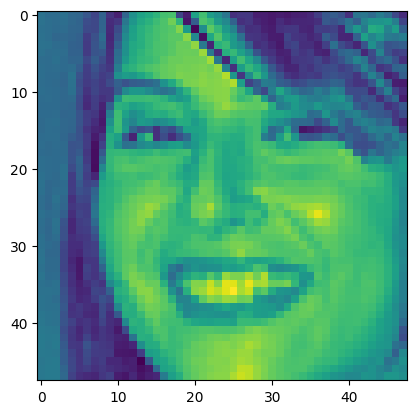

1/1 [==============================] - 0s 171ms/step
[1.3106184633438254e-17, 4.771480594819273e-22, 3.4186534714058927e-25, 1.0, 4.826771404413124e-28, 4.791078911563277e-18, 1.6679479897846656e-20]
3
Happy
Happy


In [11]:
index = 34000
test = x_train[index]
plt.imshow(test)
plt.show()
test = np.expand_dims(test, axis=0)
p = model.predict(test).tolist()[0]
print(p)
photo_mood = p.index(max(p))
val_mood = y_train[index].tolist()
y_mood = val_mood.index(max(val_mood))
print(photo_mood)
print(moods[str(photo_mood)])
print(moods[str(y_mood)])

In [29]:
model.save('./model_dir_1/model.tf')

INFO:tensorflow:Assets written to: ./model_dir_1/model.tf/assets


INFO:tensorflow:Assets written to: ./model_dir_1/model.tf/assets
